In [1]:
import Base.copy
using Distributions
using MLBase
include("Mondrian_Forest_Classifier.jl"); 
include("Mondrian_extention.jl")

expand_forest!

In [2]:
function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 2
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 2
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

Fakedata3Classif (generic function with 2 methods)

In [7]:
X, Y, x, y = Fakedata3Classif(1500,2,500); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [8]:
MF=Mondrian_Forest_Classifier(100)
Acc=zeros(150);
Time=[];

In [9]:
counter=1
train!(MF,X[1:150,:],Y[1:150],1e9);
pred=predict!(MF,x)
Acc[counter]=correctrate(y,convert(Array{Int,1},pred))

0.798

In [10]:
MN = Mondrian_Forest_Classifier(100)
train!(MN,X,Y,1e9)
pred=predict!(MN,x)
correctrate(y,convert(Array{Int,1},pred))

0.84

In [ ]:
i=151
while i<15000
    counter = counter+1
    tic()
    expand_forest!(MF,X[i:i+149,:],Y[i:i+149,:],1e9);
    t=toq()
    println(t)
    push!(Time,t)
    pred=predict!(MF,x)
    Acc[counter]=correctrate(y,convert(Array{Int,1},pred))
    i=i+150
    println("Acc: ", Acc[counter])
end

In [15]:
length(Time)

99

In [28]:
x=linspace(1,73,73)

1.0:1.0:73.0

In [31]:
using Plots

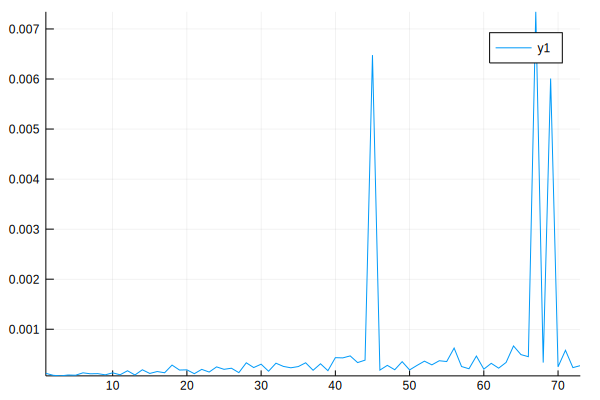

In [32]:
collect(x)
plot(x,Time)

In [33]:
A=Acc[1:73]

73-element Array{Float64,1}:
 0.0   
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 ⋮     
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722

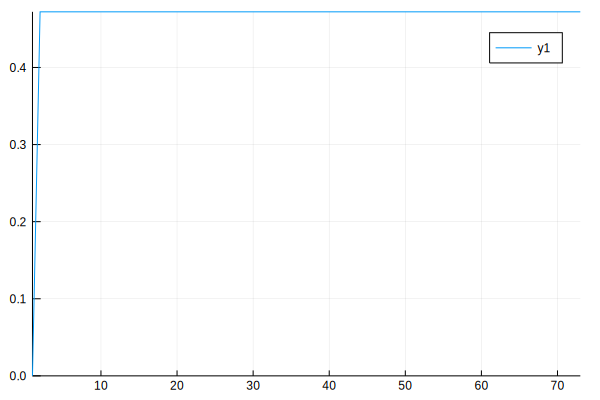

In [34]:
plot(x,A)

In [3]:
Letter = readdlm("Letter.txt")

20000×17 Array{Any,2}:
 "N"   2   3  4  2  1   5  10   3   3  10   8   8  4   8  0  8
 "F"  10  13  8  8  4   8   8   4   7  13   4   6  2   7  7  8
 "T"   4   7  6  5  6   7   7   4   5   7   6   9  5   8  5  7
 "N"   4   8  6  6  5   6   8   9   5   8   6   6  4   8  3  9
 "A"   2   8  4  5  2   7   5   3   1   6   0   8  2   7  2  7
 "A"   2   5  4  3  2   8   2   2   2   8   2   8  2   6  2  7
 "I"   2   8  5  6  5  11   6   1   6   9   4   5  1   7  5  8
 "L"   3   7  4  5  2   3   4   3   8   2   1   7  0   7  1  5
 "O"   2   3  3  1  1   8   7   7   5   7   6   8  2   8  3  8
 "S"   2   4  3  3  2   8   7   3   7  10   5   8  1   9  4  8
 "D"   3   5  4  4  3   7   7   6   6   7   6   5  5   8  3  7
 "V"   9  15  8  8  4   6  11   6   4  10  10   4  5  12  3  9
 "P"   2   7  3  4  1   4  11   8   3  10   6   4  1  10  3  8
 ⋮                  ⋮                   ⋮                 ⋮   
 "U"   5   8  6  6  4   4   8   5   7   9   7   9  4   8  4  4
 "H"   4  10  4  7  2   7   6  1

In [4]:
classes = map(x->convert(Int,x[1][1]), Letter[:,1])
classes -= minimum(classes);
classes = classes.+1;

train_data = Letter[1:15000,2:17]*1.0;
train_labels = classes[1:15000,1].+1;
test_data = Letter[15001:20000,2:17]*1.0;
test_labels = classes[15001:20000,1].+1;

In [6]:
writedlm("train_data.txt", train_data)
writedlm("train_labels.txt", train_labels)
writedlm("test_data.txt", test_data)
writedlm("test_labels.txt", test_labels)

In [14]:
MF=Mondrian_Forest_Classifier(10)
Acc=zeros(150);
Time=[];    

In [20]:
counter=1
tic
train!(MF,train_data[1:150,:],train_labels[1:150],1e9);
t=toq
push!(Time,t)
pred=predict!(MF,test_data)
Acc[counter]=correctrate(test_labels,convert(Array{Int,1},pred))

0.2432

In [21]:
i=151
while i<15000
    counter = counter+1
    println(counter)
    tic()
    expand_forest!(MF,train_data[i:i+149,:],train_labels[i:i+149,:],1e9);
    t=toq()
    println(t)
    push!(Time,t)
    pred=predict!(MF,test_data)
    Acc[counter]=correctrate(test_labels,convert(Array{Int,1},pred))
    i=i+150
    println(Acc[counter])
end

2
0.328762248

0.2432
3
0.060975386

0.2432
4
0.000123414

0.195
5
0.000102914

0.1722
6
0.000169449

0.1464
7
0.000198082

0.1242
8
0.000178532

0.115
9
0.000193234

0.1138
10
0.000210977

0.1138
11
0.000199939

0.1138
12
0.00020819

0.112
13
0.000227276

0.0998
14
0.000220606

0.0998
15
0.000340988

0.0998
16
0.000244217

0.0998
17
0.000143199

0.0998
18
0.000211095

0.0986
19
0.000136254

0.0924
20
0.000204868

0.0924
21
0.000179395

0.0926
22
0.000191475

0.0926
23
0.000209114

0.0926
24
0.000200525

0.0926
25
0.000229663

0.0926
26
0.000270508

0.0882
27
0.004025214

0.0882
28
0.00019439

0.0882
29
0.000186757

0.0882
30
0.000219342

0.0836
31
0.000154496

0.0836
32
0.000241042

0.0836
33
0.000167059

0.0836
34
0.000240506

0.0836
35
0.000260325



LoadError: [91mInterruptException:[39m

ERROR (unhandled task failure): InterruptException:
Stacktrace:
 [1] process_events at ./libuv.jl:82 [inlined]
 [2] wait() at ./event.jl:216
 [3] wait(::Condition) at ./event.jl:27
 [4] stream_wait(::Timer, ::Condition, ::Vararg{Condition,N} where N) at ./stream.jl:42
 [5] wait(::Timer) at ./event.jl:357
 [6] (::ERROR (unhandled task failure): InterruptException:
ERROR (unhandled task failure): InterruptException:
Stacktrace:
 [1] process_events at ./libuv.jl:82 [inlined]
 [2] wait() at ./event.jl:216
 [3] wait(::Condition) at ./event.jl:27
 [4] stream_wait(::Timer, ::Condition, ::Vararg{Condition,N} where N) at ./stream.jl:42
 [5] wait(::Timer) at ./event.jl:357
 [6] (::Base.##300#301{IJulia.#send_stdout,Timer})() at ./event.jl:430


In [61]:
MN = Mondrian_Forest_Classifier(100)
train!(MN,train_data,train_labels,1e9)
pred=predict!(MN,test_data)
correctrate(test_labels,convert(Array{Int,1},pred))

LoadError: [91mmode: input array cannot be empty.[39m